# Reading Data

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from collections import namedtuple
from collections import deque
from slurm import storage, files

In [9]:
TempPres = namedtuple("TempPres", "temperature pressure")
Vector2 = namedtuple("Vector2", "x y")
Vector3 = namedtuple("Vector3", "x y z")
Lidar = namedtuple("Lidar","distance")

In [23]:
def toNumpy(data, key):
    return np.array([x[key] for x in data])

In [86]:
data = storage.read("data.pickle")

In [87]:
data[0]

{'accel': Vector3(x=0.001708000199869275, y=0.012931999750435352, z=1.0165040493011475),
 'gyro': Vector3(x=0.009773843921720982, y=0.0024434609804302454, z=-0.0024434609804302454),
 'mag': Vector3(x=8.053200721740723, y=54.57468795776367, z=-63.97251892089844),
 'temppres': TempPres(temperature=23.24976348876953, pressure=840.3948364257812),
 'lidar': Lidar(distance=223.0),
 'timestamp': 1636860878.467232}

In [94]:
accel = toNumpy(data, "accel")
gyro = toNumpy(data, "gyro")
mag = toNumpy(data, "mag")
tp = toNumpy(data, "temppres")
lidar = toNumpy(data, "lidar")

# change to 0 start
ts = toNumpy(data, "timestamp")
tss = ts[0]
ts = np.array([x - tss for x in ts])

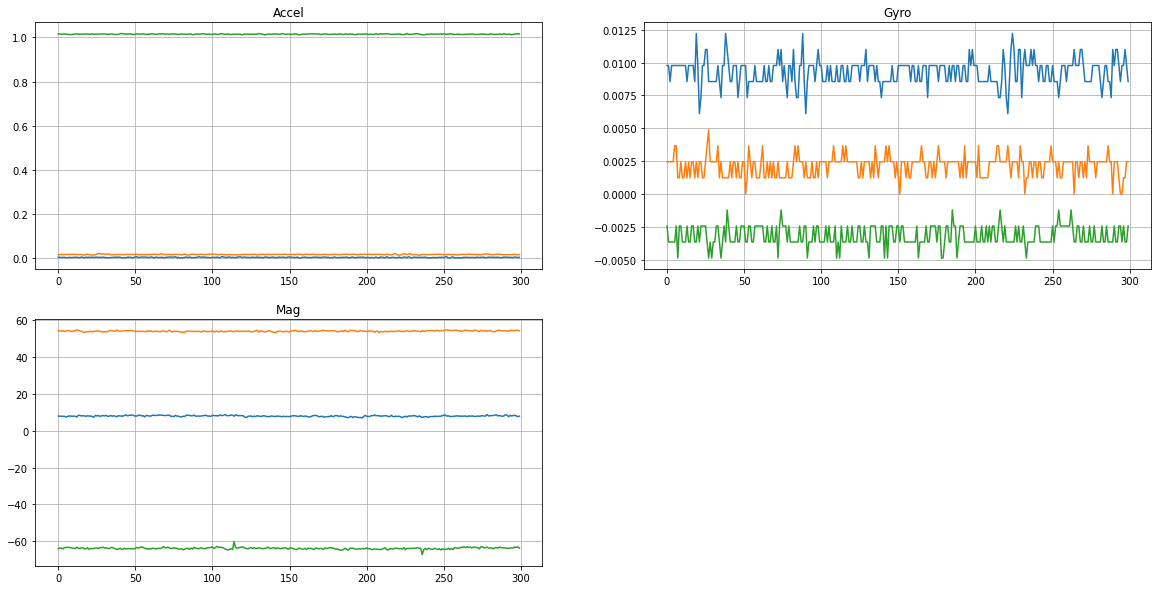

In [103]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(accel)
plt.grid(True)
plt.title("Accel");

plt.subplot(2,2,2)
plt.plot(gyro)
plt.grid(True)
plt.title("Gyro");

plt.subplot(2,2,3)
plt.plot(mag)
plt.grid(True)
plt.title("Mag");

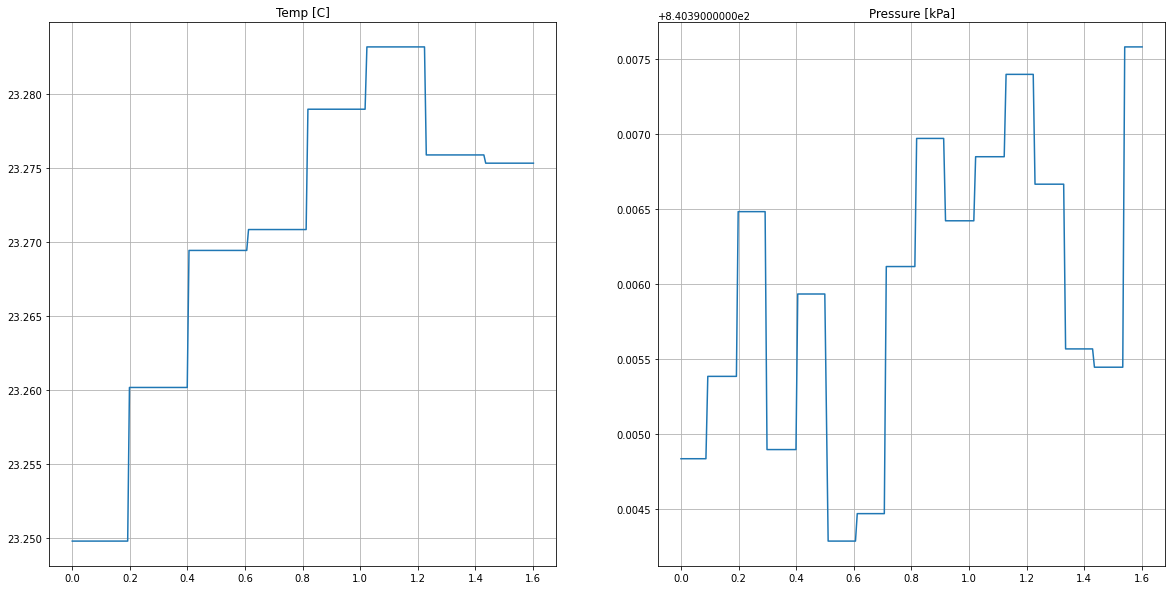

In [90]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.plot(ts,tp[:,0]); plt.grid(True); plt.title("Temp [C]")
plt.subplot(1,2,2); plt.plot(ts,tp[:,1]); plt.grid(True); plt.title("Pressure [kPa]");

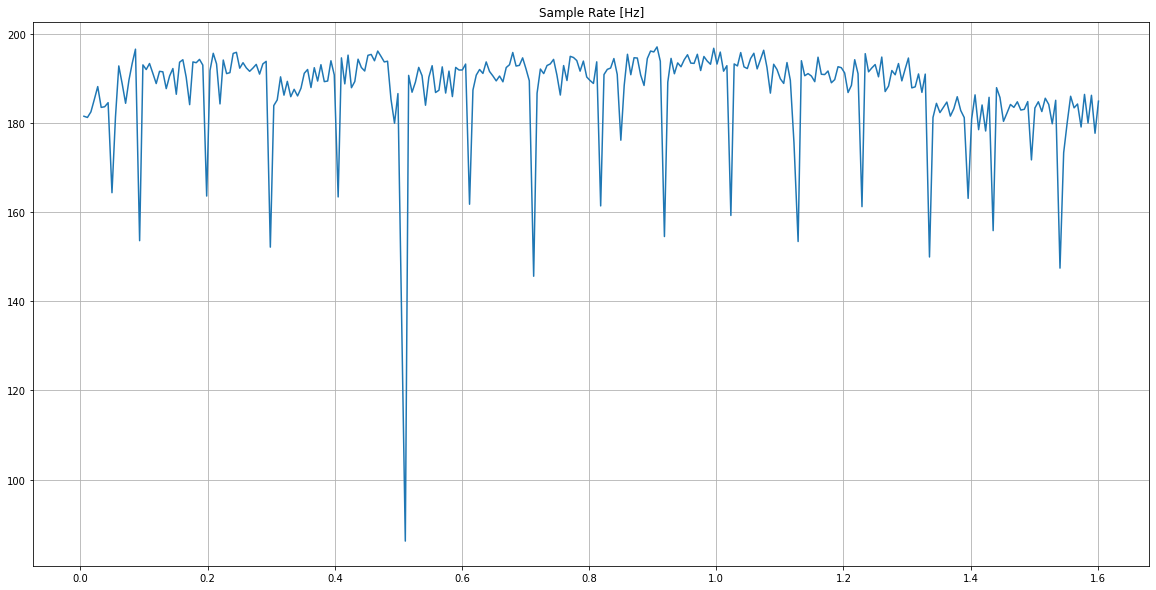

In [91]:
plt.figure(figsize=(20,10))
plt.plot(ts[1:], 1/np.diff(ts))
plt.title("Sample Rate [Hz]")
plt.grid(True);

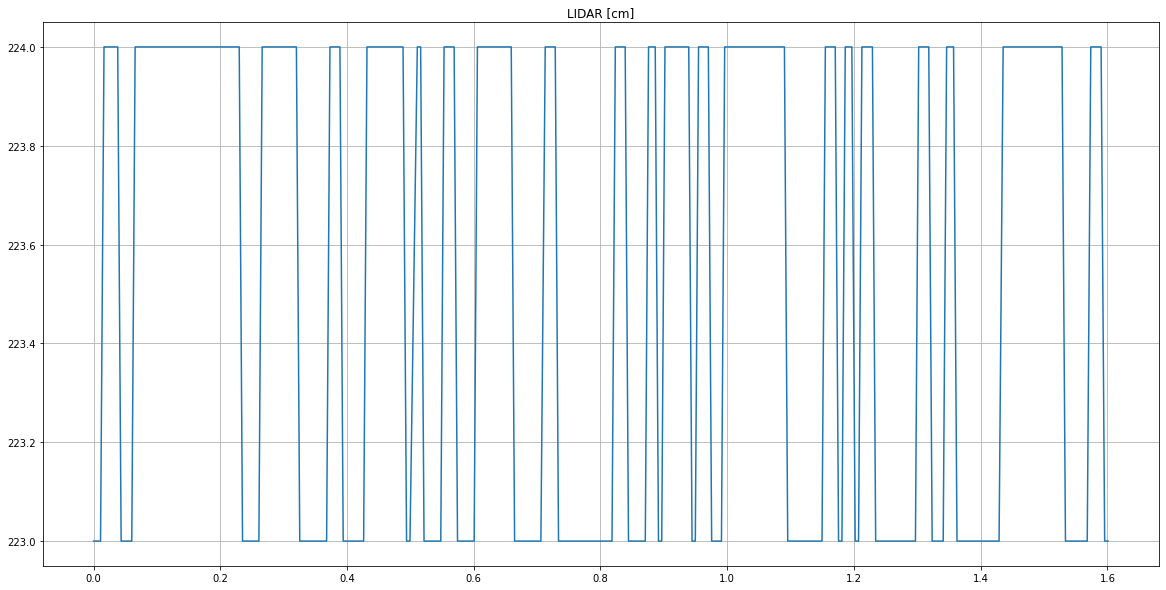

In [105]:
# lidar = [x if x < 100 else 0 for x in lidar]

plt.figure(figsize=(20,10))
plt.plot(ts, lidar)
plt.title("LIDAR [cm]")
plt.grid(True);